In [33]:
import pandas as pd

data = pd.read_csv("../pm2_data.csv")

data.head()

,Unnamed: 0,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,0,Bishkek,PM2.5 - Principal,2019-02-06 06:00:00,2019,2,6,6,-999.0,-999,NaN,12.0,UG/M3,1 Hr,Valid
1,1,Bishkek,PM2.5 - Principal,2019-02-06 07:00:00,2019,2,6,7,17.0,61,Moderate,20.0,UG/M3,1 Hr,Valid
2,2,Bishkek,PM2.5 - Principal,2019-02-06 08:00:00,2019,2,6,8,19.1,66,Moderate,21.0,UG/M3,1 Hr,Valid
3,3,Bishkek,PM2.5 - Principal,2019-02-06 09:00:00,2019,2,6,9,22.4,73,Moderate,25.0,UG/M3,1 Hr,Valid
4,4,Bishkek,PM2.5 - Principal,2019-02-06 10:00:00,2019,2,6,10,30.9,91,Moderate,39.0,UG/M3,1 Hr,Valid


In [34]:
data.isnull().sum()

Unnamed: 0         0
Site               0
Parameter          0
Date (LT)          0
Year               0
Month              0
Day                0
Hour               0
NowCast Conc.      0
AQI                0
AQI Category     202
Raw Conc.          0
Conc. Unit         0
Duration           0
QC Name            0
dtype: int64

In [35]:
data.dropna(inplace=True)

In [36]:
data['QC Name'].unique()

array(['Valid', 'Invalid', 'Missing', 'Suspect'], dtype=object)

In [37]:
data.drop('Unnamed: 0',axis=1, inplace=True)
data.drop('Site',axis=1, inplace=True)
data.drop('Parameter',axis=1, inplace=True)
data.drop('Date (LT)',axis=1, inplace=True)
data.drop('Conc. Unit',axis=1, inplace=True)
data.drop('Duration',axis=1, inplace=True)


In [38]:
# data.drop('AQI',axis=1, inplace=True)

In [39]:
data.drop('QC Name',axis=1, inplace=True)

In [40]:
data.tail()

,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
33515,2022,10,10,20,33.7,96,Moderate,46.0
33516,2022,10,10,21,36.8,104,Unhealthy for Sensitive Groups,40.0
33517,2022,10,10,22,35.4,100,Moderate,34.0
33518,2022,10,10,23,33.2,95,Moderate,31.0
33519,2022,10,11,0,33.1,95,Moderate,33.0


In [41]:
data['AQI Category'].unique()

array(['Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous', 'Good'], dtype=object)

In [42]:
# Hot encoding
# importing sklearn one hot encoding
from sklearn.preprocessing import OneHotEncoder
# initializing one hot encoding
encoding = OneHotEncoder()


In [43]:
# # applying one hot encoding in python
# transformed_data = encoding.fit_transform(data[['QC Name']])

In [44]:
# Getting one hot encoded categories
#print(encoding.categories_)

In [45]:
# # adding the encoded values
# data[encoding.categories_[0]] = transformed_data.toarray()

# # deleting the uncoded one
# data.drop('QC Name', axis=1, inplace=True)

# data heading
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,61,Moderate,20.0
2,2019,2,6,8,19.1,66,Moderate,21.0
3,2019,2,6,9,22.4,73,Moderate,25.0
4,2019,2,6,10,30.9,91,Moderate,39.0
5,2019,2,6,11,35.0,99,Moderate,39.0


In [47]:
# # Import sklearn labelencoder
# from sklearn import preprocessing
  
# # initializing sklearn labelencoder
# label_encoder = preprocessing.LabelEncoder()
  
# # encoding marrige column
# data['AQI Category']= label_encoder.fit_transform(data['AQI Category'])


In [48]:
# # importing numpy
# import numpy as np
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize = ( 15, 6))

# # Creating explode data
# explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

# # creating variables
# one = 0
# two = 0
# three = 0
# four = 0
# five = 0
# six = 0
# # for loop to itreate through the output class
# for i in data['AQI Category']:
#     if i =="Moderate":
#         one+=1
#     elif i =='Unhealthy for Sensitive Groups':
#         two+=1
#     elif i == 'Unhealthy':
#         three+=1
#     elif i == 'Very Unhealthy':
#         four+=1
#     elif i == 'Hazardous':
#         five+=1
#     elif i == 'Good':
#         six+=1
# # creating numpy arry
# labels = ['Moredate', 'UFSG', 'Unhealthy', 'very unhealthy', 'hazardous', 'good']

# values = np.array([one, two, three, four, five, six])
# plt.pie(values, labels = labels, autopct='%1.2f%%', explode = explode,)
# plt.legend()
# plt.show()

In [49]:
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
# for loop to itreate through the output class
for i in data['AQI Category']:
    if i ==0:
        one+=1
    elif i ==1:
        two+=1
    elif i == 2:
        three+=1
    elif i == 3:
        four+=1
    elif i == 4:
        five+=1
    elif i == 5:
        six+=1

In [50]:
print(one)
print(two)
print(three)
print(four)
print(five)
print(six)

10400
387
14846
3380
3482
823


In [51]:
# splitting the dataset into input and output
Input = data.drop('AQI Category', axis=1)

Output =data['AQI Category']

In [52]:
from sklearn.model_selection import train_test_split


# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.30, random_state=40)

In [53]:
X_train.shape

(23322, 7)

In [54]:
# importing the CatBoot classifier
from catboost import CatBoostClassifier

# initializing the CatBoost classifier
CatBoost_clf = CatBoostClassifier()

# training the catboost classifier model
CatBoost_clf.fit(X_train, y_train)

Learning rate set to 0.092914
0:	learn: 1.3801629	total: 69.7ms	remaining: 1m 9s
1:	learn: 1.1266930	total: 80.3ms	remaining: 40.1s
2:	learn: 0.9468288	total: 90.5ms	remaining: 30.1s
3:	learn: 0.8122669	total: 102ms	remaining: 25.4s
4:	learn: 0.7059549	total: 113ms	remaining: 22.5s
5:	learn: 0.6195134	total: 125ms	remaining: 20.6s
6:	learn: 0.5454241	total: 136ms	remaining: 19.3s
7:	learn: 0.4846037	total: 147ms	remaining: 18.2s
8:	learn: 0.4312457	total: 157ms	remaining: 17.3s
9:	learn: 0.3852354	total: 169ms	remaining: 16.7s
10:	learn: 0.3447341	total: 180ms	remaining: 16.2s
11:	learn: 0.3089415	total: 192ms	remaining: 15.8s
12:	learn: 0.2787657	total: 205ms	remaining: 15.6s
13:	learn: 0.2511359	total: 219ms	remaining: 15.4s
14:	learn: 0.2269223	total: 231ms	remaining: 15.2s
15:	learn: 0.2054311	total: 245ms	remaining: 15s
16:	learn: 0.1855298	total: 255ms	remaining: 14.8s
17:	learn: 0.1686904	total: 267ms	remaining: 14.6s
18:	learn: 0.1529122	total: 277ms	remaining: 14.3s
19:	learn:

164:	learn: 0.0011007	total: 2.02s	remaining: 10.2s
165:	learn: 0.0010989	total: 2.03s	remaining: 10.2s
166:	learn: 0.0010745	total: 2.04s	remaining: 10.2s
167:	learn: 0.0010701	total: 2.06s	remaining: 10.2s
168:	learn: 0.0010687	total: 2.07s	remaining: 10.2s
169:	learn: 0.0010649	total: 2.08s	remaining: 10.2s
170:	learn: 0.0010628	total: 2.09s	remaining: 10.1s
171:	learn: 0.0010618	total: 2.1s	remaining: 10.1s
172:	learn: 0.0010200	total: 2.11s	remaining: 10.1s
173:	learn: 0.0010189	total: 2.12s	remaining: 10.1s
174:	learn: 0.0009980	total: 2.14s	remaining: 10.1s
175:	learn: 0.0009965	total: 2.15s	remaining: 10.1s
176:	learn: 0.0009914	total: 2.16s	remaining: 10s
177:	learn: 0.0009879	total: 2.17s	remaining: 10s
178:	learn: 0.0009847	total: 2.18s	remaining: 10s
179:	learn: 0.0009719	total: 2.19s	remaining: 9.99s
180:	learn: 0.0009705	total: 2.2s	remaining: 9.97s
181:	learn: 0.0009662	total: 2.21s	remaining: 9.95s
182:	learn: 0.0009630	total: 2.23s	remaining: 9.94s
183:	learn: 0.000962

326:	learn: 0.0004454	total: 3.86s	remaining: 7.94s
327:	learn: 0.0004450	total: 3.87s	remaining: 7.93s
328:	learn: 0.0004445	total: 3.88s	remaining: 7.92s
329:	learn: 0.0004442	total: 3.9s	remaining: 7.91s
330:	learn: 0.0004392	total: 3.91s	remaining: 7.9s
331:	learn: 0.0004364	total: 3.92s	remaining: 7.88s
332:	learn: 0.0004360	total: 3.93s	remaining: 7.87s
333:	learn: 0.0004354	total: 3.94s	remaining: 7.86s
334:	learn: 0.0004349	total: 3.95s	remaining: 7.84s
335:	learn: 0.0004341	total: 3.96s	remaining: 7.83s
336:	learn: 0.0004336	total: 3.97s	remaining: 7.81s
337:	learn: 0.0004330	total: 3.98s	remaining: 7.8s
338:	learn: 0.0004324	total: 3.99s	remaining: 7.79s
339:	learn: 0.0004320	total: 4s	remaining: 7.77s
340:	learn: 0.0004314	total: 4.01s	remaining: 7.76s
341:	learn: 0.0004268	total: 4.03s	remaining: 7.75s
342:	learn: 0.0004265	total: 4.04s	remaining: 7.73s
343:	learn: 0.0004258	total: 4.05s	remaining: 7.72s
344:	learn: 0.0004254	total: 4.06s	remaining: 7.71s
345:	learn: 0.0004

486:	learn: 0.0002737	total: 5.7s	remaining: 6s
487:	learn: 0.0002729	total: 5.71s	remaining: 5.99s
488:	learn: 0.0002727	total: 5.72s	remaining: 5.98s
489:	learn: 0.0002724	total: 5.74s	remaining: 5.97s
490:	learn: 0.0002690	total: 5.75s	remaining: 5.96s
491:	learn: 0.0002686	total: 5.76s	remaining: 5.95s
492:	learn: 0.0002685	total: 5.77s	remaining: 5.93s
493:	learn: 0.0002683	total: 5.78s	remaining: 5.92s
494:	learn: 0.0002681	total: 5.79s	remaining: 5.91s
495:	learn: 0.0002679	total: 5.8s	remaining: 5.9s
496:	learn: 0.0002677	total: 5.82s	remaining: 5.89s
497:	learn: 0.0002676	total: 5.83s	remaining: 5.88s
498:	learn: 0.0002674	total: 5.84s	remaining: 5.87s
499:	learn: 0.0002671	total: 5.86s	remaining: 5.86s
500:	learn: 0.0002667	total: 5.87s	remaining: 5.85s
501:	learn: 0.0002666	total: 5.88s	remaining: 5.84s
502:	learn: 0.0002663	total: 5.9s	remaining: 5.83s
503:	learn: 0.0002633	total: 5.91s	remaining: 5.82s
504:	learn: 0.0002619	total: 5.93s	remaining: 5.81s
505:	learn: 0.00026

647:	learn: 0.0001957	total: 7.57s	remaining: 4.11s
648:	learn: 0.0001955	total: 7.58s	remaining: 4.1s
649:	learn: 0.0001954	total: 7.59s	remaining: 4.09s
650:	learn: 0.0001938	total: 7.61s	remaining: 4.08s
651:	learn: 0.0001927	total: 7.62s	remaining: 4.07s
652:	learn: 0.0001925	total: 7.63s	remaining: 4.05s
653:	learn: 0.0001909	total: 7.64s	remaining: 4.04s
654:	learn: 0.0001908	total: 7.65s	remaining: 4.03s
655:	learn: 0.0001907	total: 7.66s	remaining: 4.02s
656:	learn: 0.0001905	total: 7.67s	remaining: 4.01s
657:	learn: 0.0001905	total: 7.68s	remaining: 3.99s
658:	learn: 0.0001903	total: 7.7s	remaining: 3.98s
659:	learn: 0.0001902	total: 7.71s	remaining: 3.97s
660:	learn: 0.0001895	total: 7.72s	remaining: 3.96s
661:	learn: 0.0001894	total: 7.73s	remaining: 3.95s
662:	learn: 0.0001892	total: 7.74s	remaining: 3.94s
663:	learn: 0.0001887	total: 7.75s	remaining: 3.92s
664:	learn: 0.0001886	total: 7.76s	remaining: 3.91s
665:	learn: 0.0001885	total: 7.78s	remaining: 3.9s
666:	learn: 0.0

810:	learn: 0.0001534	total: 9.42s	remaining: 2.19s
811:	learn: 0.0001533	total: 9.43s	remaining: 2.18s
812:	learn: 0.0001532	total: 9.45s	remaining: 2.17s
813:	learn: 0.0001525	total: 9.46s	remaining: 2.16s
814:	learn: 0.0001524	total: 9.47s	remaining: 2.15s
815:	learn: 0.0001524	total: 9.48s	remaining: 2.14s
816:	learn: 0.0001523	total: 9.49s	remaining: 2.13s
817:	learn: 0.0001523	total: 9.5s	remaining: 2.11s
818:	learn: 0.0001522	total: 9.51s	remaining: 2.1s
819:	learn: 0.0001521	total: 9.52s	remaining: 2.09s
820:	learn: 0.0001521	total: 9.53s	remaining: 2.08s
821:	learn: 0.0001520	total: 9.54s	remaining: 2.07s
822:	learn: 0.0001519	total: 9.55s	remaining: 2.05s
823:	learn: 0.0001519	total: 9.56s	remaining: 2.04s
824:	learn: 0.0001518	total: 9.57s	remaining: 2.03s
825:	learn: 0.0001517	total: 9.59s	remaining: 2.02s
826:	learn: 0.0001517	total: 9.6s	remaining: 2.01s
827:	learn: 0.0001516	total: 9.61s	remaining: 2s
828:	learn: 0.0001516	total: 9.62s	remaining: 1.98s
829:	learn: 0.0001

972:	learn: 0.0001268	total: 11.3s	remaining: 313ms
973:	learn: 0.0001268	total: 11.3s	remaining: 301ms
974:	learn: 0.0001265	total: 11.3s	remaining: 290ms
975:	learn: 0.0001265	total: 11.3s	remaining: 278ms
976:	learn: 0.0001265	total: 11.3s	remaining: 267ms
977:	learn: 0.0001264	total: 11.3s	remaining: 255ms
978:	learn: 0.0001259	total: 11.3s	remaining: 243ms
979:	learn: 0.0001259	total: 11.4s	remaining: 232ms
980:	learn: 0.0001258	total: 11.4s	remaining: 220ms
981:	learn: 0.0001258	total: 11.4s	remaining: 209ms
982:	learn: 0.0001257	total: 11.4s	remaining: 197ms
983:	learn: 0.0001256	total: 11.4s	remaining: 185ms
984:	learn: 0.0001251	total: 11.4s	remaining: 174ms
985:	learn: 0.0001251	total: 11.4s	remaining: 162ms
986:	learn: 0.0001250	total: 11.4s	remaining: 151ms
987:	learn: 0.0001250	total: 11.4s	remaining: 139ms
988:	learn: 0.0001250	total: 11.5s	remaining: 127ms
989:	learn: 0.0001249	total: 11.5s	remaining: 116ms
990:	learn: 0.0001249	total: 11.5s	remaining: 104ms
991:	learn: 

In [55]:
# making predictions
catboost_pred = CatBoost_clf.predict(X_test)

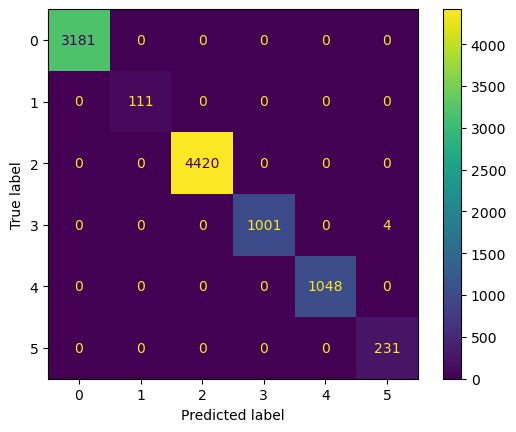

In [56]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# <a href="https://techfor-today.com/sklearn-confusion-matrix-in-machine-learning/">confusion matrix</a> plotting
cm = confusion_matrix(y_test, catboost_pred, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [57]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, catboost_pred))

The accuracy is:  0.9995998399359743


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, catboost_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00      4420
           3       1.00      1.00      1.00      1005
           4       1.00      1.00      1.00      1048
           5       0.98      1.00      0.99       231

    accuracy                           1.00      9996
   macro avg       1.00      1.00      1.00      9996
weighted avg       1.00      1.00      1.00      9996



In [59]:
catboost_pred_train = CatBoost_clf.predict(X_train)

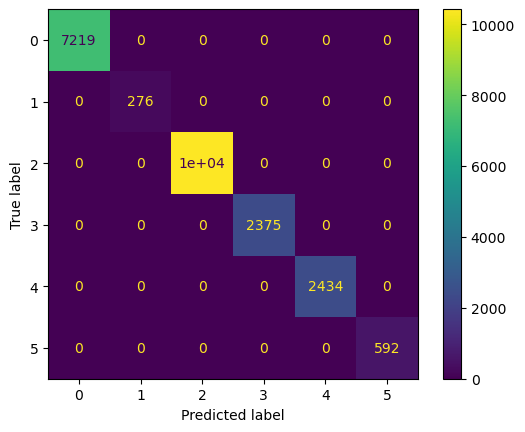

In [60]:
cm = confusion_matrix(y_train, catboost_pred_train, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [61]:
# printing
print("The accuracy is: ", accuracy_score(y_train, catboost_pred_train))

The accuracy is:  1.0


In [62]:
print(classification_report(y_train, catboost_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7219
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00     10426
           3       1.00      1.00      1.00      2375
           4       1.00      1.00      1.00      2434
           5       1.00      1.00      1.00       592

    accuracy                           1.00     23322
   macro avg       1.00      1.00      1.00     23322
weighted avg       1.00      1.00      1.00     23322



In [63]:
import pickle
pickle.dump(CatBoost_clf, open('CatBoost', 'wb'))

In [64]:
# importing the lightgbm module
import lightgbm as lgb

# initializing the model
model_Clf = lgb.LGBMClassifier()

# training the model
model_Clf.fit(X_train, y_train)

LGBMClassifier()

In [65]:
# making prediction 
clf_pred = model_Clf.predict(X_test)
clf_pred_train= model_Clf.predict(X_train)

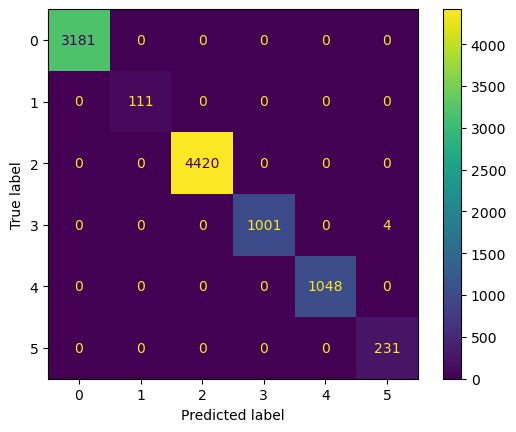

In [66]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, clf_pred, labels=model_Clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Clf.classes_)
disp.plot()
plt.show()

In [67]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, clf_pred))

The accuracy is:  0.9995998399359743


In [68]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00      4420
           3       1.00      1.00      1.00      1005
           4       1.00      1.00      1.00      1048
           5       0.98      1.00      0.99       231

    accuracy                           1.00      9996
   macro avg       1.00      1.00      1.00      9996
weighted avg       1.00      1.00      1.00      9996



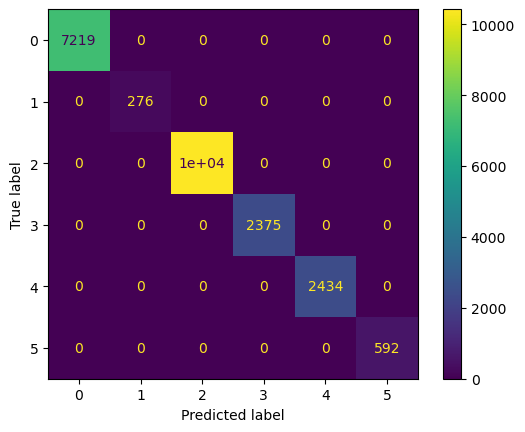

In [69]:
cm = confusion_matrix(y_train, clf_pred_train, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [70]:
print("The accuracy is: ", accuracy_score(y_train, clf_pred_train))
print(classification_report(y_train, clf_pred_train))

The accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7219
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00     10426
           3       1.00      1.00      1.00      2375
           4       1.00      1.00      1.00      2434
           5       1.00      1.00      1.00       592

    accuracy                           1.00     23322
   macro avg       1.00      1.00      1.00     23322
weighted avg       1.00      1.00      1.00     23322



In [71]:
import pickle
pickle.dump(model_Clf, open('LightGBM', 'wb'))

In [72]:
# importing sklearn knn classifier
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=5 )

In [73]:
# model training
classifer.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
# making predictions
y_pred = classifer.predict(X_test)
y_pred_train = classifer.predict(X_train)

In [99]:
y_pred

array([0, 4, 3, ..., 2, 0, 0])

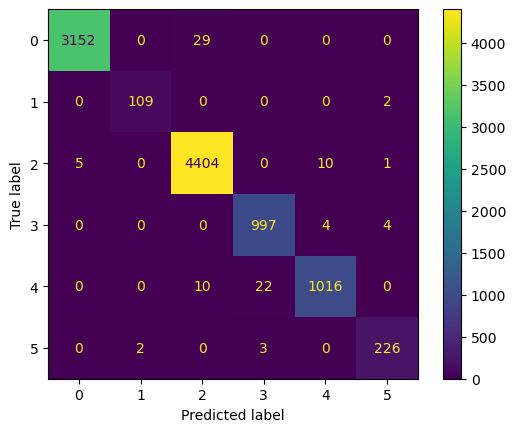

In [75]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, y_pred, labels=classifer.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()
plt.show()

In [76]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy 
accuracy_score(y_test,y_pred) 

0.990796318527411

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3181
           1       0.98      0.98      0.98       111
           2       0.99      1.00      0.99      4420
           3       0.98      0.99      0.98      1005
           4       0.99      0.97      0.98      1048
           5       0.97      0.98      0.97       231

    accuracy                           0.99      9996
   macro avg       0.98      0.98      0.98      9996
weighted avg       0.99      0.99      0.99      9996



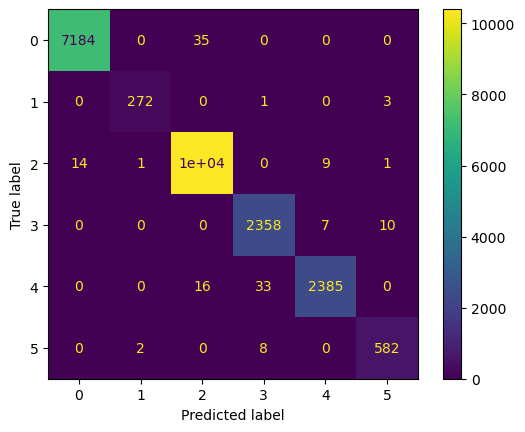

In [78]:
cm = confusion_matrix(y_train, y_pred_train, labels=classifer.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [79]:
print("The accuracy is: ", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

The accuracy is:  0.9939970842980876
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7219
           1       0.99      0.99      0.99       276
           2       1.00      1.00      1.00     10426
           3       0.98      0.99      0.99      2375
           4       0.99      0.98      0.99      2434
           5       0.98      0.98      0.98       592

    accuracy                           0.99     23322
   macro avg       0.99      0.99      0.99     23322
weighted avg       0.99      0.99      0.99     23322



In [80]:
import pickle
pickle.dump(classifer, open('KNN', 'wb'))

In [81]:
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,61,2,20.0
2,2019,2,6,8,19.1,66,2,21.0
3,2019,2,6,9,22.4,73,2,25.0
4,2019,2,6,10,30.9,91,2,39.0
5,2019,2,6,11,35.0,99,2,39.0


In [82]:
# # importing required module for Neural Networks for Classification using TensorFlow
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras import Sequential

In [83]:
# # defineNeural Networks for Classification using TensorFlow model
# model = Sequential()
# # adding input layer with 16 nodes
# model.add(InputLayer(6))
# # adding hidden layer with 10 nodes
# model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

In [97]:
# adding output layer 
# model.add(Dense(6, activation='softmax'))

In [95]:
# # compile the Neural Networks for Classification using TensorFlow model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # fit the model
# model.fit(X_train, y_train, epochs=50)

In [96]:
# # evaluate Neural Networks for Classification using TensorFlow
# evaluate = model.evaluate(X_test, y_test)
# print('Test Accuracy:', evaluate[1])

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3181
           1       0.98      0.98      0.98       111
           2       0.99      1.00      0.99      4420
           3       0.98      0.99      0.98      1005
           4       0.99      0.97      0.98      1048
           5       0.97      0.98      0.97       231

    accuracy                           0.99      9996
   macro avg       0.98      0.98      0.98      9996
weighted avg       0.99      0.99      0.99      9996



In [88]:
# importing the xgboost module
import xgboost as xgb

# Default parameters
xgboost_clf = xgb.XGBClassifier()

# training the model
xgboost_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [89]:
# testing the model
xgboost_preds = xgboost_clf.predict(X_test)

In [98]:
xgboost_preds

array([0, 4, 3, ..., 2, 0, 0])

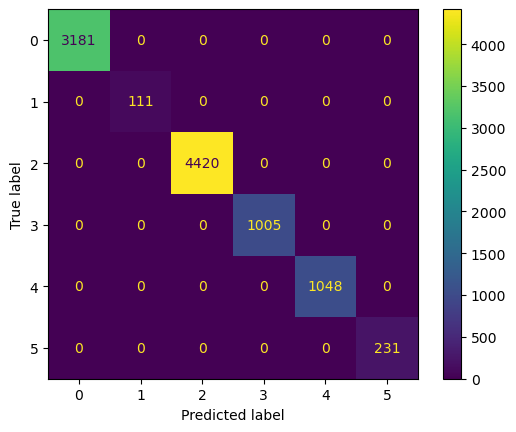

In [90]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test,xgboost_preds, labels=xgboost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgboost_clf.classes_)
disp.plot()
plt.show()

In [94]:
# # importing the module
# from sklearn.metrics import accuracy_score

# # printing
# print("The accuracy is: ", accuracy_score(y_test, xgboost_preds))

In [100]:
import pickle
pickle.dump(xgboost_clf, open('XGBoost', 'wb'))